In [7]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../../inkscape/cap6/crankshaft/"
PATH_EPS=BASE_PATH+"/../../../../../eps/cap6/crankshaft/"
fname = "speedup_mpi_consist_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = True
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/crankshaft_17810_consist_p1-p2-p4_mpi.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

NumberNodes  P1_ElapsedTime  P2_ElapsedTime  P4_ElapsedTime  P1_SpeedUp  P2_SpeedUp  P4_SpeedUp  P1_Efficiency  P2_Efficiency  P4_Efficiency  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
0            1         91.2671        551.2162       8887.5238      1.0000      1.0000      1.0000         1.0000         1.0000         1.0000                 0.17                 0.18                 0.28                 98.97                 99.06                 99.61
1            2         50.3661        301.0106       4439.3626      1.8120      1.8312      2.0019         0.9060         0.9156         1.0009                 0.15                 0.18                 0.28                 98.87                 98.52                 99.23
2            4         24.8081        145.6845       2181.3990      3.6789      3.7836      4.0742         0.9197         0.9459         1.0185                 0.11                 0.20                 0.27                 97.95                 97.56                 97.38
3            8         12.5006         73.4730       1079.0286      7.3010      7.5022      8.2365         0.9126         0.9377         1.0295                 0.09                 0.20                 0.27                 98.70                 98.36                 99.29

In [8]:
# Rename columns
df_speedup = df.rename(columns={"P1_SpeedUp": "P1", "P2_SpeedUp": "P2", "P4_SpeedUp": "P4"})
df_speedup.columns

Index(['NumberNodes', 'P1_ElapsedTime', 'P2_ElapsedTime', 'P4_ElapsedTime',
       'P1', 'P2', 'P4', 'P1_Efficiency', 'P2_Efficiency', 'P4_Efficiency',
       'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)',
       'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)'],
      dtype='object')

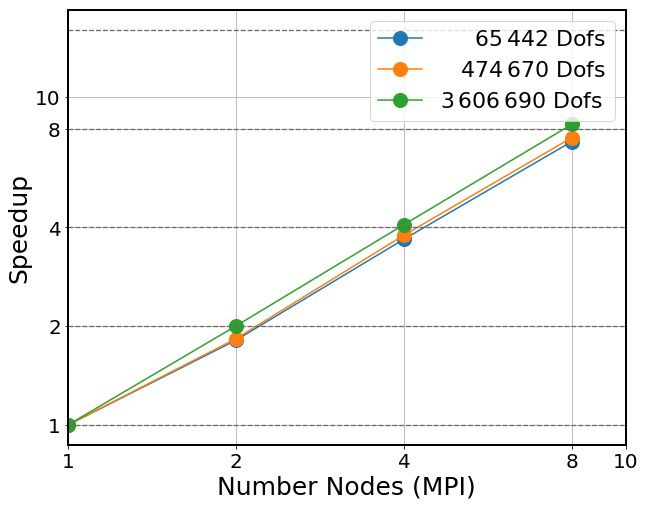

In [9]:
select_columns=['NumberNodes', 'P1', 'P2', 'P4']

fig = df_speedup[select_columns].plot(
    kind='line', 
    x='NumberNodes', 
    linestyle='-', 
    marker='o', 
    markersize=14,
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 10], [1, 2, 4, 8, 10], fontsize=20)
plt.yticks([1, 2, 4, 8, 10], [1, 2, 4, 8, 10], fontsize=20)

lines = [1, 2, 4, 8, 16]
for i in lines:
    plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('Speedup', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [10]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [11]:
# Rename columns
df_efficiency = df.rename(columns={"P1_Efficiency": "P1", "P2_Efficiency": "P2", "P4_Efficiency": "P4"})
df_efficiency.columns

Index(['NumberNodes', 'P1_ElapsedTime', 'P2_ElapsedTime', 'P4_ElapsedTime',
       'P1_SpeedUp', 'P2_SpeedUp', 'P4_SpeedUp', 'P1', 'P2', 'P4',
       'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)',
       'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)'],
      dtype='object')

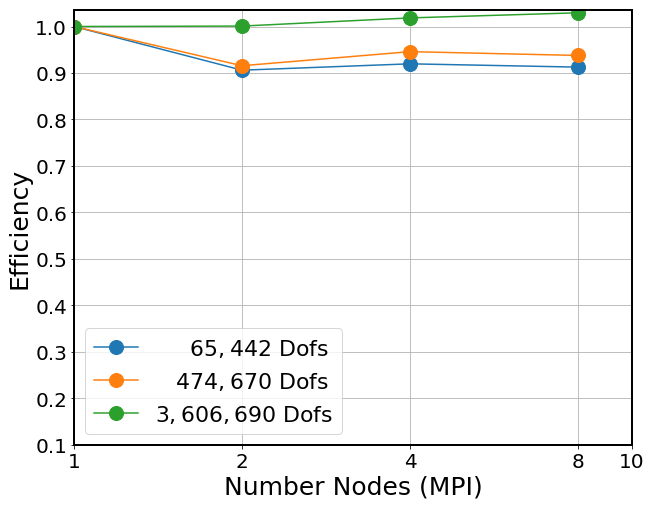

In [12]:
select_columns=['NumberNodes', 'P1', 'P2', 'P4']

fig = df_efficiency[select_columns].plot(
    kind='line', 
    x='NumberNodes', 
    linestyle='-', 
    marker='o', 
    markersize=14,
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 10], [1, 2, 4, 8, 10], fontsize=20)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=20)

# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('Efficiency', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65,442$ Dofs", "   $474,670$ Dofs", "$3,606,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [13]:
fname = "efficiency_mpi_consist_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [14]:
# Select columns
select_columns=['NumberNodes', 'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)']
df_cache = df[select_columns].copy()
# Calculate percentage multiply by 100.
df_cache["P1_L2-Cache-Miss(%)"] = df_cache["P1_L2-Cache-Miss(%)"]*100
df_cache["P2_L2-Cache-Miss(%)"] = df_cache["P2_L2-Cache-Miss(%)"]*100
df_cache["P4_L2-Cache-Miss(%)"] = df_cache["P4_L2-Cache-Miss(%)"]*100
df_cache

NumberNodes  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)
0            1                 17.0                 18.0                 28.0
1            2                 15.0                 18.0                 28.0
2            4                 11.0                 20.0                 27.0
3            8                  9.0                 20.0                 27.0

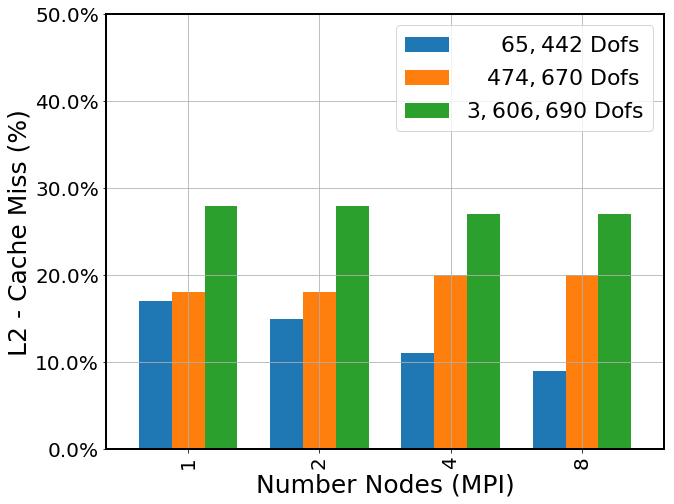

In [15]:
fig = df_cache[["NumberNodes", "P1_L2-Cache-Miss(%)", "P2_L2-Cache-Miss(%)", "P4_L2-Cache-Miss(%)"]].plot(
    kind='bar', 
    x='NumberNodes',
    width=0.75,
    figsize=(10, 8)
).get_figure()

# plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50])
plt.xticks(fontsize=20)
plt.yticks([0.0, 10.0, 20.0, 30.0, 40.0, 50.0], ["0.0%", "10.0%", "20.0%", "30.0%", "40.0%", "50.0%"], fontsize=20)

# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('L2 - Cache Miss (%)', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65,442$ Dofs", "   $474,670$ Dofs", "$3,606,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [16]:
fname = "l2-cache-miss_mpi_consist_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [17]:
# Select columns
select_columns=['NumberNodes', 'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)']
df_region = df[select_columns].copy()
df_region

NumberNodes  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
0            1                 98.97                 99.06                 99.61
1            2                 98.87                 98.52                 99.23
2            4                 97.95                 97.56                 97.38
3            8                 98.70                 98.36                 99.29

[98.7, 98.36, 99.29]


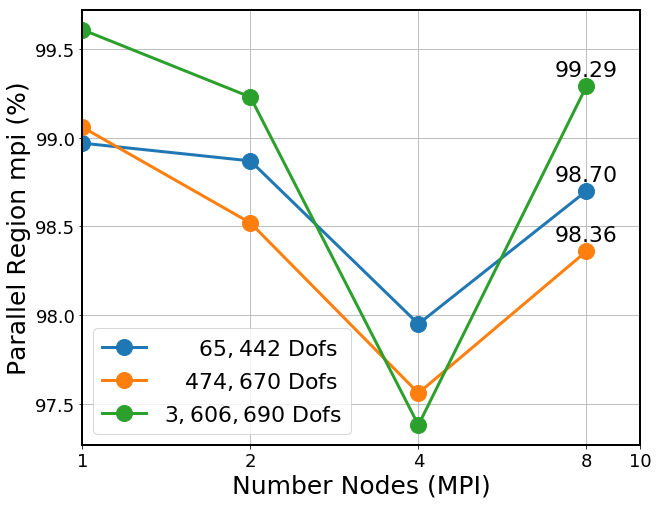

In [18]:
fig = df_region.plot(
    kind='line', 
    x='NumberNodes',
    marker='o',
    markersize=16,
#     alpha=0.3,
    linewidth=3.0,
#     ylim=(0,300),
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 10], [1, 2, 4, 8, 10])
# plt.yticks([50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0], [50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0])


xs=list(df_region["NumberNodes"][3:7])+list(df_region["NumberNodes"][3:7])+list(df_region["NumberNodes"][3:7])
ys=list(df_region["P1_ParallelRegion(%)"][3:7])+list(df_region["P2_ParallelRegion(%)"][3:7])+list(df_region["P4_ParallelRegion(%)"][3:7])
print(ys)

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 fontsize=22,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('Parallel Region mpi (%)', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.35, 0.22), frameon = True)
plt.legend(labels=["     $65,442$ Dofs", "   $474,670$ Dofs", "$3,606,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [19]:
fname = "parallel_region_mpi_consist_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>